In [1]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
from collections import defaultdict
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

In [2]:
enhanced_Interaction_Customer_Transaction_Login = pd.read_csv("enhanced_customer_data.csv")

In [3]:
enhanced_Interaction_Customer_Transaction_Login

,CustomerID,Age,ChurnStatus,Zscore_Genderdiff,Zscore_Age_rangediff,Zscore_MaritalStatusdiff,Zscore_IncomeLeveldiff,Gender_M,Age_range_20-30,Age_range_30-40,...,Rolling_7D_Clothing_bined_Rolling_7D_Clothing_150+,Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40,LoginFrequency,DaysSinceLastLogin,LoginFrequency_Ratio,ServiceUsage_Online Banking,ServiceUsage_Website,LoginCategory_Medium,LoginCategory_High,LoginCategory_VeryHigh
0,1,62,0,21.898796,3.071478,0.860114,33.051301,True,False,False,...,False,False,34,71,0.693878,False,False,False,True,False
1,2,65,1,21.898796,3.071478,38.161316,33.051301,True,False,False,...,False,False,5,26,0.102041,False,True,False,False,False
2,3,18,0,21.898796,2.238200,0.860114,33.051301,True,False,False,...,False,False,3,46,0.061224,False,True,False,False,False
3,4,21,0,21.898796,-17.033005,-14.640432,33.051301,True,True,False,...,False,False,2,128,0.040816,False,True,False,False,False
4,5,21,0,21.898796,-17.033005,-30.394573,-9.421698,True,True,False,...,False,False,41,65,0.836735,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,0,-23.096539,20.951841,0.860114,33.051301,False,False,False,...,False,False,38,336,0.775510,False,False,False,True,False
996,997,19,0,21.898796,2.238200,-14.640432,-27.049698,True,False,False,...,False,False,5,274,0.102041,False,False,False,False,False
997,998,47,0,21.898796,6.257337,38.161316,33.051301,True,False,False,...,False,False,47,174,0.959184,False,True,False,False,True
998,999,23,0,21.898796,-17.033005,-14.640432,-27.049698,True,True,False,...,False,False,23,357,0.469388,False,True,True,False,False


In [4]:
enhanced_Interaction_Customer_Transaction_Login.columns

Index(['CustomerID', 'Age', 'ChurnStatus', 'Zscore_Genderdiff',
       'Zscore_Age_rangediff', 'Zscore_MaritalStatusdiff',
       'Zscore_IncomeLeveldiff', 'Gender_M', 'Age_range_20-30',
       'Age_range_30-40', 'Age_range_40-50', 'Age_range_50-60',
       'Age_range_60+', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium',
       'Duration_Interation', 'Markov_Churn_prob', 'Complaint', 'Feedback',
       'Inquiry', 'Resolved', 'Unresolved', 'Rolling_7D_Sum',
       'Rolling_7D_0-200', 'Rolling_7D_200-400', 'Rolling_7D_400-600',
       'Rolling_7D_600+', 'Rolling_7D_Books', 'Rolling_7D_Clothing',
       'Rolling_7D_Electronics', 'Rolling_7D_Furniture',
       'Rolling_7D_Groceries',
       'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210',
       'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210+',
       'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_310',
       'Rolling_7D_Electronics_bined_Rolling_7

In [50]:
baseline_data = (enhanced_Interaction_Customer_Transaction_Login.copy()[['CustomerID', 'Age', 'ChurnStatus','Duration_Interation','Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50', 'Age_range_50-60', 'Age_range_60+','LoginFrequency', 'DaysSinceLastLogin','ServiceUsage_Online Banking', 'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High', 'LoginCategory_VeryHigh']])

In [51]:
baseline_data.columns

Index(['CustomerID', 'Age', 'ChurnStatus', 'Duration_Interation', 'Gender_M',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium',
       'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50',
       'Age_range_50-60', 'Age_range_60+', 'LoginFrequency',
       'DaysSinceLastLogin', 'ServiceUsage_Online Banking',
       'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High',
       'LoginCategory_VeryHigh'],
      dtype='object')

In [53]:
X = baseline_data.drop(columns=["ChurnStatus"])
y = baseline_data["ChurnStatus"].astype(int)


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col] , errors='ignore')  
    except:
        print(f"can not transform: {col}")


X_train, X_test_baseline, y_train, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model_baseline = XGBClassifier(
    n_estimators=100,       
    max_depth=10,           
    learning_rate=0.1,      
    random_state=42
)



xgb_model_baseline.fit(X_train, y_train)

y_pred = xgb_model_baseline.predict(X_test_baseline)

report = classification_report(y_test_baseline, y_pred)
print("report:", report)

report:               precision    recall  f1-score   support

           0       0.80      0.93      0.86       159
           1       0.27      0.10      0.14        41

    accuracy                           0.76       200
   macro avg       0.53      0.51      0.50       200
weighted avg       0.69      0.76      0.71       200



/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_91558/2402704606.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col] , errors='ignore')


In [8]:
X = enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"])
y = enhanced_Interaction_Customer_Transaction_Login["ChurnStatus"].astype(int)


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col] , errors='ignore')  
    except:
        print(f"can not transform {col}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_91558/4119102381.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col] , errors='ignore')  # 'ignore' 让非数值列保持不变


In [9]:
def focal_loss(alpha, gamma):
    def focal_loss_func(y_pred, y_true):
        p_t = np.exp(-y_pred)
        loss = alpha * (1 - p_t) ** gamma * y_pred
        return "focal_loss", np.mean(loss)
    return focal_loss_func


In [10]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"]), enhanced_Interaction_Customer_Transaction_Login["ChurnStatus"].astype(int)
, random_state=123)
mi_scores_df = pd.DataFrame({'Feature': enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"]).columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False)

print(mi_scores_df.head(40))

                                              Feature  MI Score
53                               ServiceUsage_Website  0.023989
30                                Rolling_7D_Clothing  0.020915
54                               LoginCategory_Medium  0.020584
4                            Zscore_MaritalStatusdiff  0.019372
12                              MaritalStatus_Married  0.018458
29                                   Rolling_7D_Books  0.018309
49                                     LoginFrequency  0.017536
8                                     Age_range_30-40  0.016729
7                                     Age_range_20-30  0.016718
26                                 Rolling_7D_200-400  0.013307
46  Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...  0.013058
36  Rolling_7D_Electronics_bined_Rolling_7D_Electr...  0.012295
37  Rolling_7D_Electronics_bined_Rolling_7D_Electr...  0.011920
51                               LoginFrequency_Ratio  0.009713
10                                    Ag

In [19]:
correlation_matrix[abs(correlation_matrix["ChurnStatus"]) > 0.001].index

Index(['ServiceUsage_Website', 'Rolling_7D_Clothing', 'LoginCategory_Medium',
       'Zscore_MaritalStatusdiff', 'MaritalStatus_Married', 'Rolling_7D_Books',
       'LoginFrequency', 'Age_range_30-40', 'Age_range_20-30',
       'Rolling_7D_200-400',
       'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_80',
       'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_310',
       'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_360',
       'LoginFrequency_Ratio', 'Age_range_50-60',
       'ServiceUsage_Online Banking', 'Rolling_7D_400-600', 'Unresolved',
       'MaritalStatus_Widowed', 'Age_range_40-50', 'Age_range_60+',
       'CustomerID', 'Zscore_Genderdiff', 'ChurnStatus'],
      dtype='object')

In [48]:
from ctgan import CTGAN
import pandas as pd
from tqdm import tqdm  
import time

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

data = enhanced_Interaction_Customer_Transaction_Login.copy()



data_to_augment = data[data['ChurnStatus'] == 1]  
num_samples = len(data_to_augment) * 5  


epochs = 500


ctgan = CTGAN(epochs=epochs, batch_size=500, verbose=False)  


print("Training CTGAN...")
for epoch in tqdm(range(epochs), desc="CTGAN Training Progress"):
    
    ctgan.fit(data_to_augment)  

print("CTGAN Training Complete!")


print("Generating synthetic data...")
new_data = ctgan.sample(num_samples)


for col in data_to_augment.columns:
    if col in new_data.columns:
        new_data[col] = new_data[col].astype(data_to_augment[col].dtype)

print("Synthetic Data Generated!")


augmented_data = pd.concat([data, new_data], ignore_index=True)



Training CTGAN...


CTGAN Training Progress: 100%|██████████████████| 50/50 [02:14<00:00,  2.69s/it]


CTGAN Training Complete!
🔄 Generating synthetic data...
✅ Synthetic Data Generated!
🎯 Training XGBoost Model...
✅ XGBoost Training Complete!
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       159
           1       0.94      0.81      0.87       245

    accuracy                           0.85       404
   macro avg       0.85      0.86      0.85       404
weighted avg       0.87      0.85      0.85       404



In [70]:
X = augmented_data.drop(columns=["ChurnStatus"])
y = augmented_data["ChurnStatus"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from xgboost import XGBClassifier
print("🎯 Training XGBoost Model...")
model_enhanced = XGBClassifier(n_estimators=30, max_depth=10, learning_rate=0.1, random_state=42)
model_enhanced.fit(X_train, y_train)
print("✅ XGBoost Training Complete!")


y_pred = model_enhanced.predict(X_test)


from sklearn.metrics import classification_report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

🎯 Training XGBoost Model...
✅ XGBoost Training Complete!
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       159
           1       0.96      0.81      0.88       245

    accuracy                           0.86       404
   macro avg       0.86      0.88      0.86       404
weighted avg       0.88      0.86      0.87       404



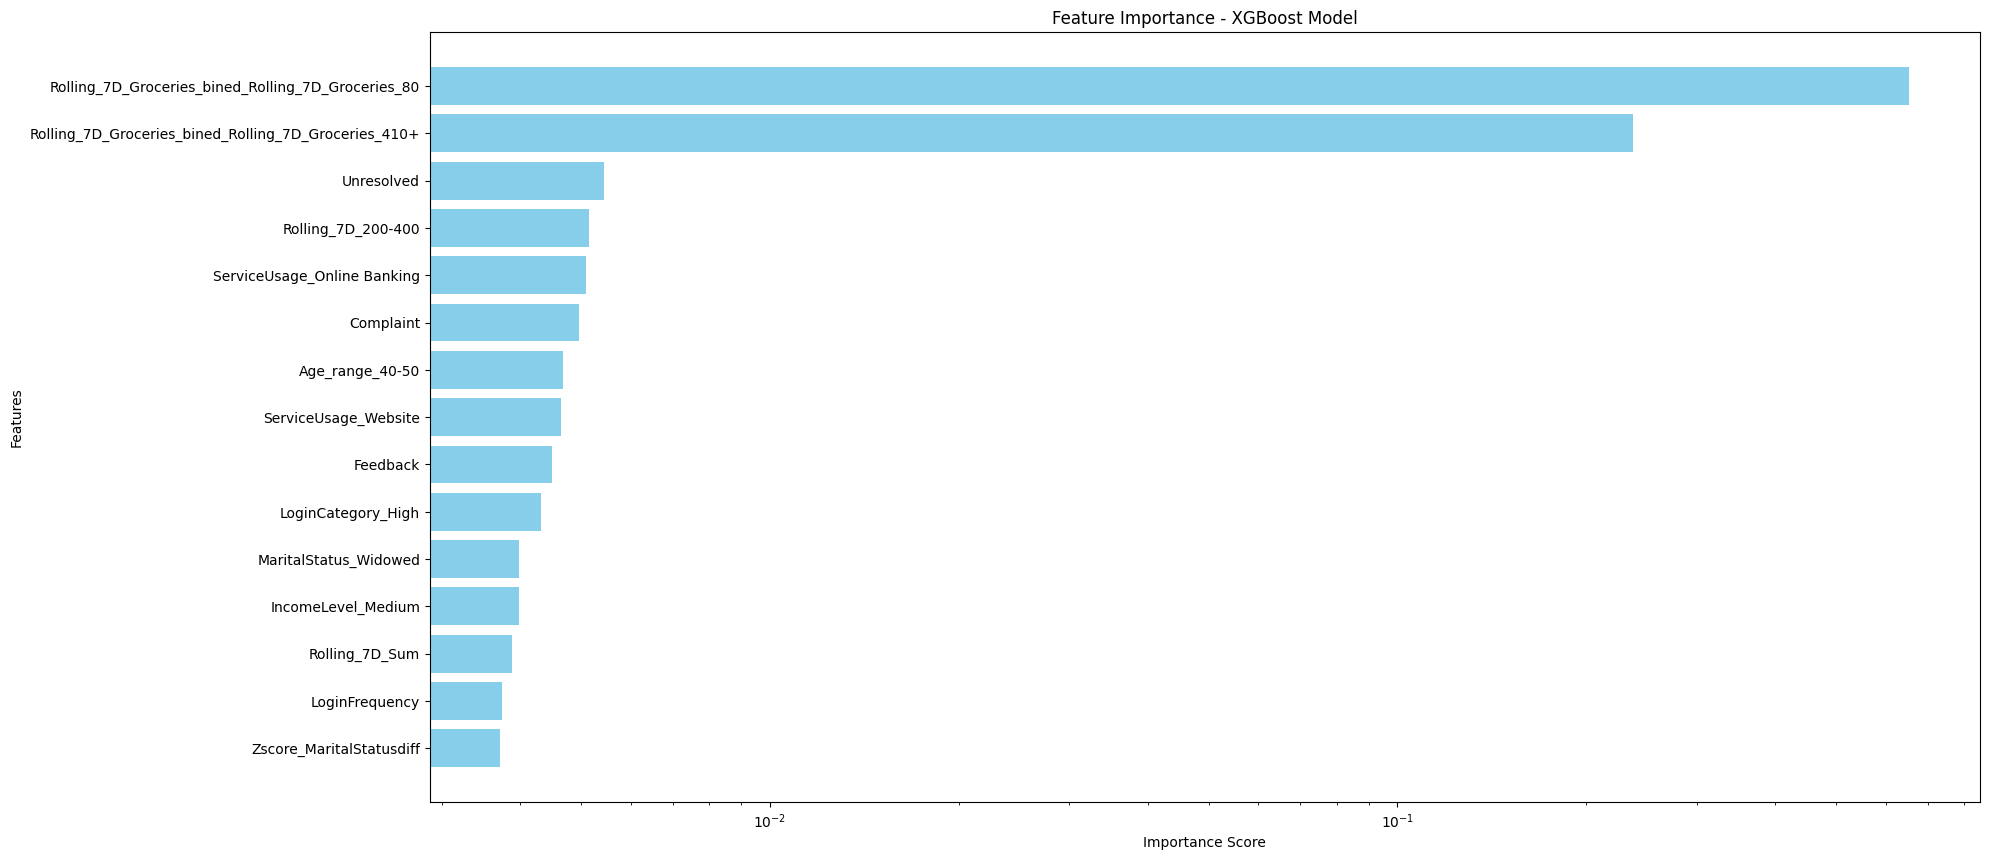

In [78]:
feature_importances = model_enhanced.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(20, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.title("Feature Importance - XGBoost Model")
plt.xscale("log")
plt.gca().invert_yaxis()
plt.savefig("Plots/importance_rank.png", dpi=300, bbox_inches='tight')
plt.show()


In [76]:
importance_df

,Feature,Importance
46,Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...,0.654101
45,Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...,0.237621
23,Unresolved,0.005438
26,Rolling_7D_200-400,0.005156
52,ServiceUsage_Online Banking,0.005088
19,Complaint,0.004958
9,Age_range_40-50,0.004691
53,ServiceUsage_Website,0.004653
20,Feedback,0.004492
55,LoginCategory_High,0.004325


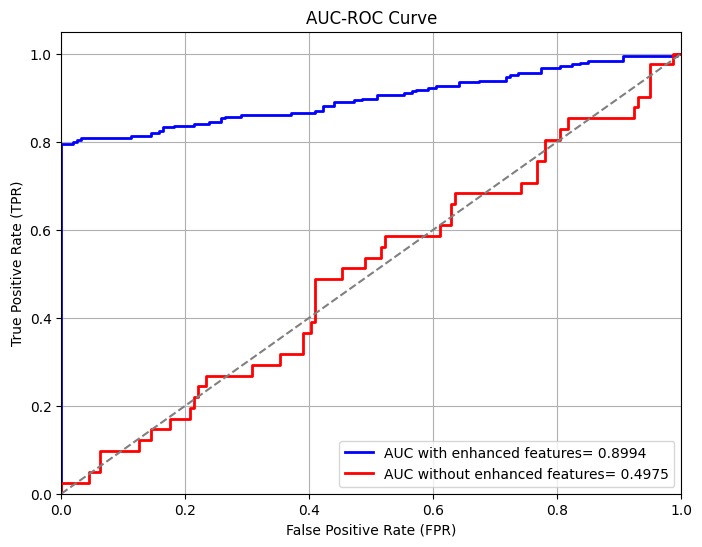

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_proba = model_enhanced.predict_proba(X_test)[:, 1]
y_pred_proba_baseline = xgb_model_baseline.predict_proba(X_test_baseline)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fpr_baseline, tpr_baseline, _1 = roc_curve(y_test_baseline, y_pred_proba_baseline)

roc_auc = auc(fpr, tpr)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC with enhanced features= {roc_auc:.4f}")
plt.plot(fpr_baseline, tpr_baseline, color="red", lw=2, label=f"AUC without enhanced features= {roc_auc_baseline:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("Plots/AUCs.png", dpi=300, bbox_inches='tight')
plt.show()
